In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pyfpgrowth
import pickle
color = sns.color_palette()

In [29]:
df=pd.read_csv("D:\Projects\Bootstrap_paradox\Hackathon\hackathon_data.csv",parse_dates=['order_date','product_addedtobasket_on'])
df['product_addedtobasket_on'] = df['product_addedtobasket_on'].dt.tz_localize('Asia/Kolkata')

In [50]:
df['dow']=df['product_addedtobasket_on'].dt.dayofweek
df['moy']=df['product_addedtobasket_on'].dt.month.astype(str)+'-'+df['product_addedtobasket_on'].dt.year.astype(str)
df['hod']=df['product_addedtobasket_on'].dt.hour
df['dom']=df['product_addedtobasket_on'].dt.day

In [57]:
df['moy']=df['moy'].astype('datetime64[ns]')

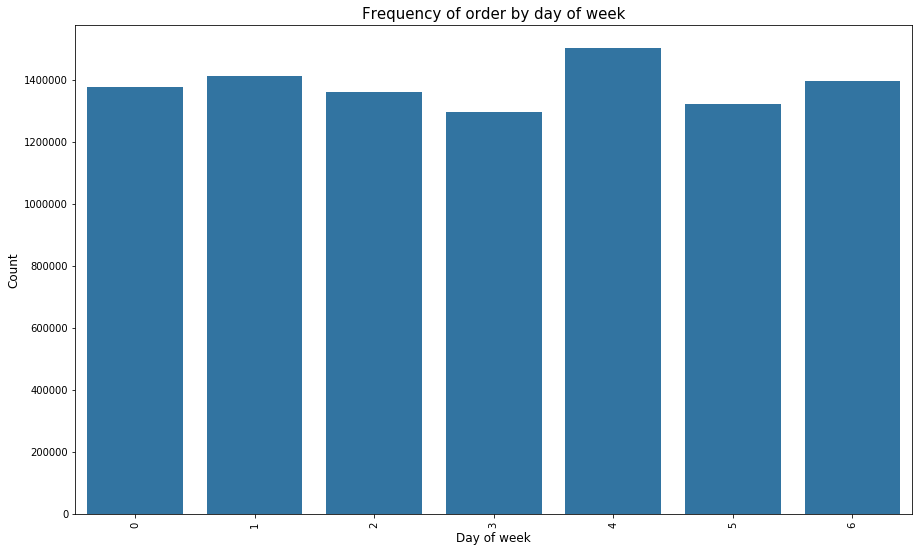

In [4]:
plt.figure(1,figsize=(15,9))
sns.countplot(x="dow", data=df, color=color[0])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by day of week", fontsize=15)
plt.show()

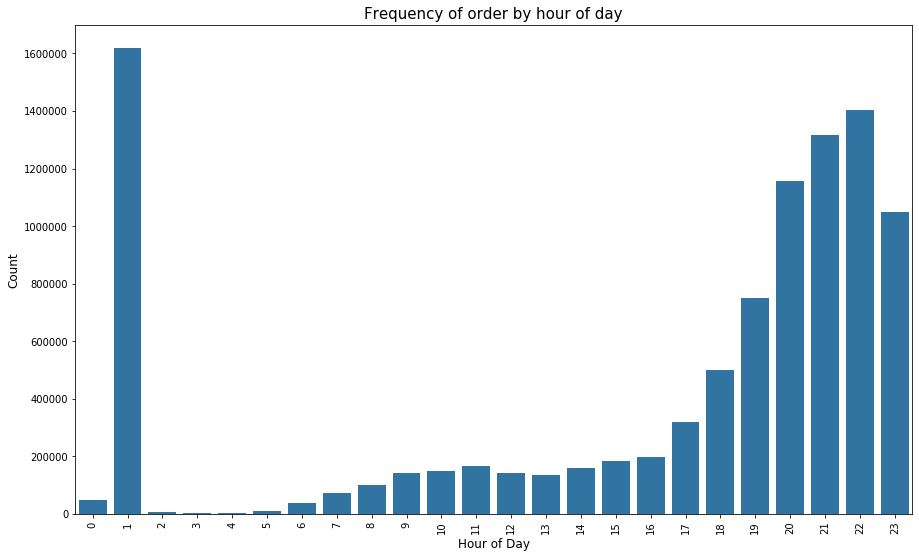

In [5]:
plt.figure(2,figsize=(15,9))
sns.countplot(x="hod", data=df, color=color[0])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Hour of Day', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by hour of day", fontsize=15)
plt.show()

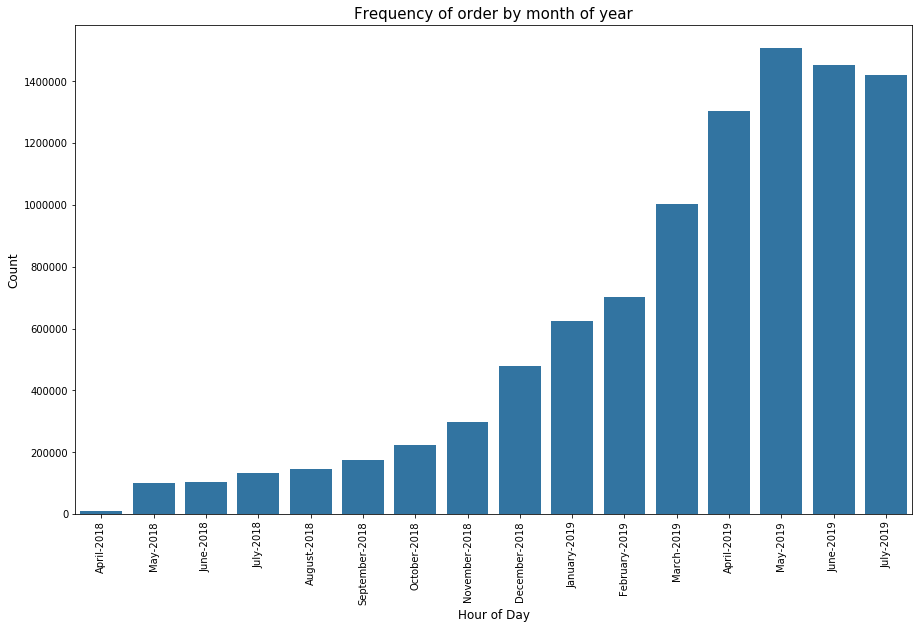

In [45]:
plt.figure(3,figsize=(15,9))
sns.countplot(x="moy", data=df, color=color[0])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Hour of Day', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by month of year", fontsize=15)
plt.show()

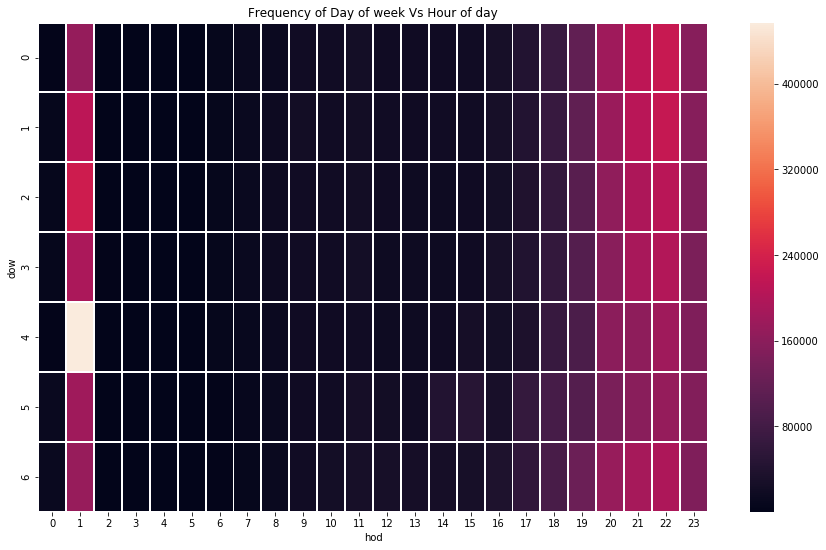

In [37]:
grouped_df = df.groupby(["dow", "hod"])["order_id"].aggregate("count").reset_index()
grouped_df = grouped_df.pivot('dow', 'hod', 'order_id')

plt.figure(4,figsize=(15,9))
sns.heatmap(grouped_df,linewidths=1,linecolor='white')
plt.title("Frequency of Day of week Vs Hour of day")
plt.show()

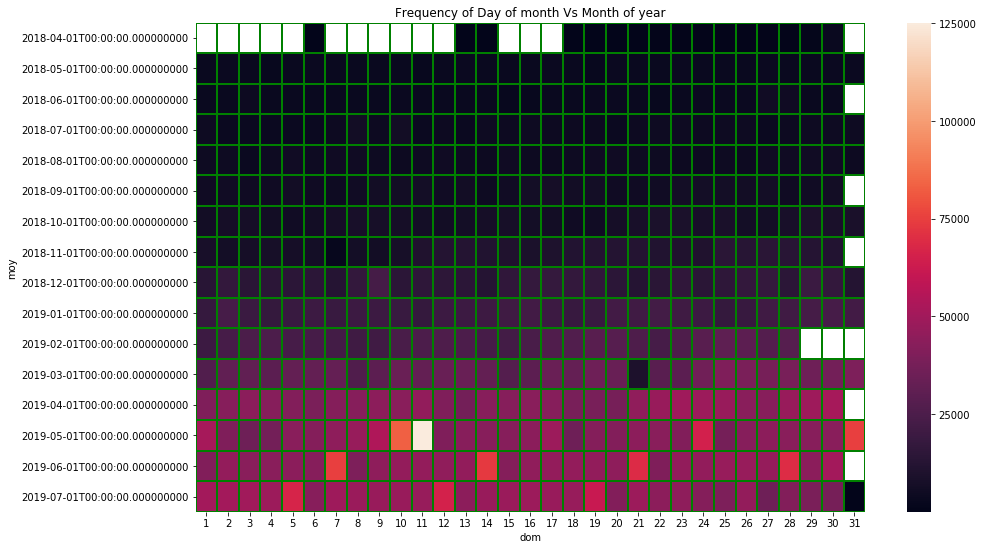

In [92]:
grouped_df = df.groupby(["moy", "dom"])["order_id"].aggregate("count").reset_index()
grouped_df_norm = grouped_df
group_df_norm= grouped_df_norm.groupby("moy")["order_id"].aggregate(np.max)

grouped_df_hm = grouped_df.pivot('moy', 'dom', 'order_id')

plt.figure(4,figsize=(15,9))
sns.heatmap(grouped_df_hm,linewidths=1,linecolor='green')
plt.title("Frequency of Day of month Vs Month of year")
plt.show()

In [104]:
transactions={}
for i in df.city_id.unique():
    temp = df[df.city_id==i]
    b = []
    for j in temp.order_id.unique():
        b.append(temp[temp.order_id==j].product_id.tolist())
    transactions[i] = b

KeyboardInterrupt: 

In [103]:
def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [101]:
save_obj(transactions,'city_split')
#transactions = load_obj("city_split")

KeyError: '1120112'